using this data set we will construct a model which is going to explain the corelation between the cars milage ,which is our target(dependent variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #for linear regression
from sklearn.model_selection import train_test_split #splits data to train and test
#origin
#1.is represents as it is from asia
#2.from europe
#3.america

Importing packages pandas for managing packages,numpy for mathematical computation,
matplotlib for graphical representation,seaborn for visualiation and linear regression

In [3]:
#load data
data=pd.read_csv("auto-mpg.csv")

reading the csv file auto mpg

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data.shape

(398, 9)

dataset contain 398 rows and 9 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


all the data are numeric except horsepower and car name

In [7]:
data=data.drop('car name',axis=1)

In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
data['origin']=data['origin'].replace({1:'asia',2:'europe',3:'america'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,asia
1,15.0,8,350.0,165,3693,11.5,70,asia
2,18.0,8,318.0,150,3436,11.0,70,asia
3,16.0,8,304.0,150,3433,12.0,70,asia
4,17.0,8,302.0,140,3449,10.5,70,asia


In [11]:
#one hot encoding
data=pd.get_dummies(data,columns=['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [13]:
hpisdigit=pd.DataFrame(data.horsepower.str.isdigit())
data[hpisdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,0,1,0
126,21.0,6,200.0,?,2875,17.0,74,0,1,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,0,1,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,0,1,0


using isdigit method onto horsepower column because to detect  where is 
the nondigit value in the column horsepower

In [15]:
data=data.replace('?',np.nan)
data[hpisdigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,0,1,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,0,1,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,0,1,0


In [17]:
medianfiller=lambda x:x.fillna(x.median())
data=data.apply(medianfiller,axis=0)
data['horsepower']=data['horsepower'].astype('float64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


using medianfiller imputation technique.

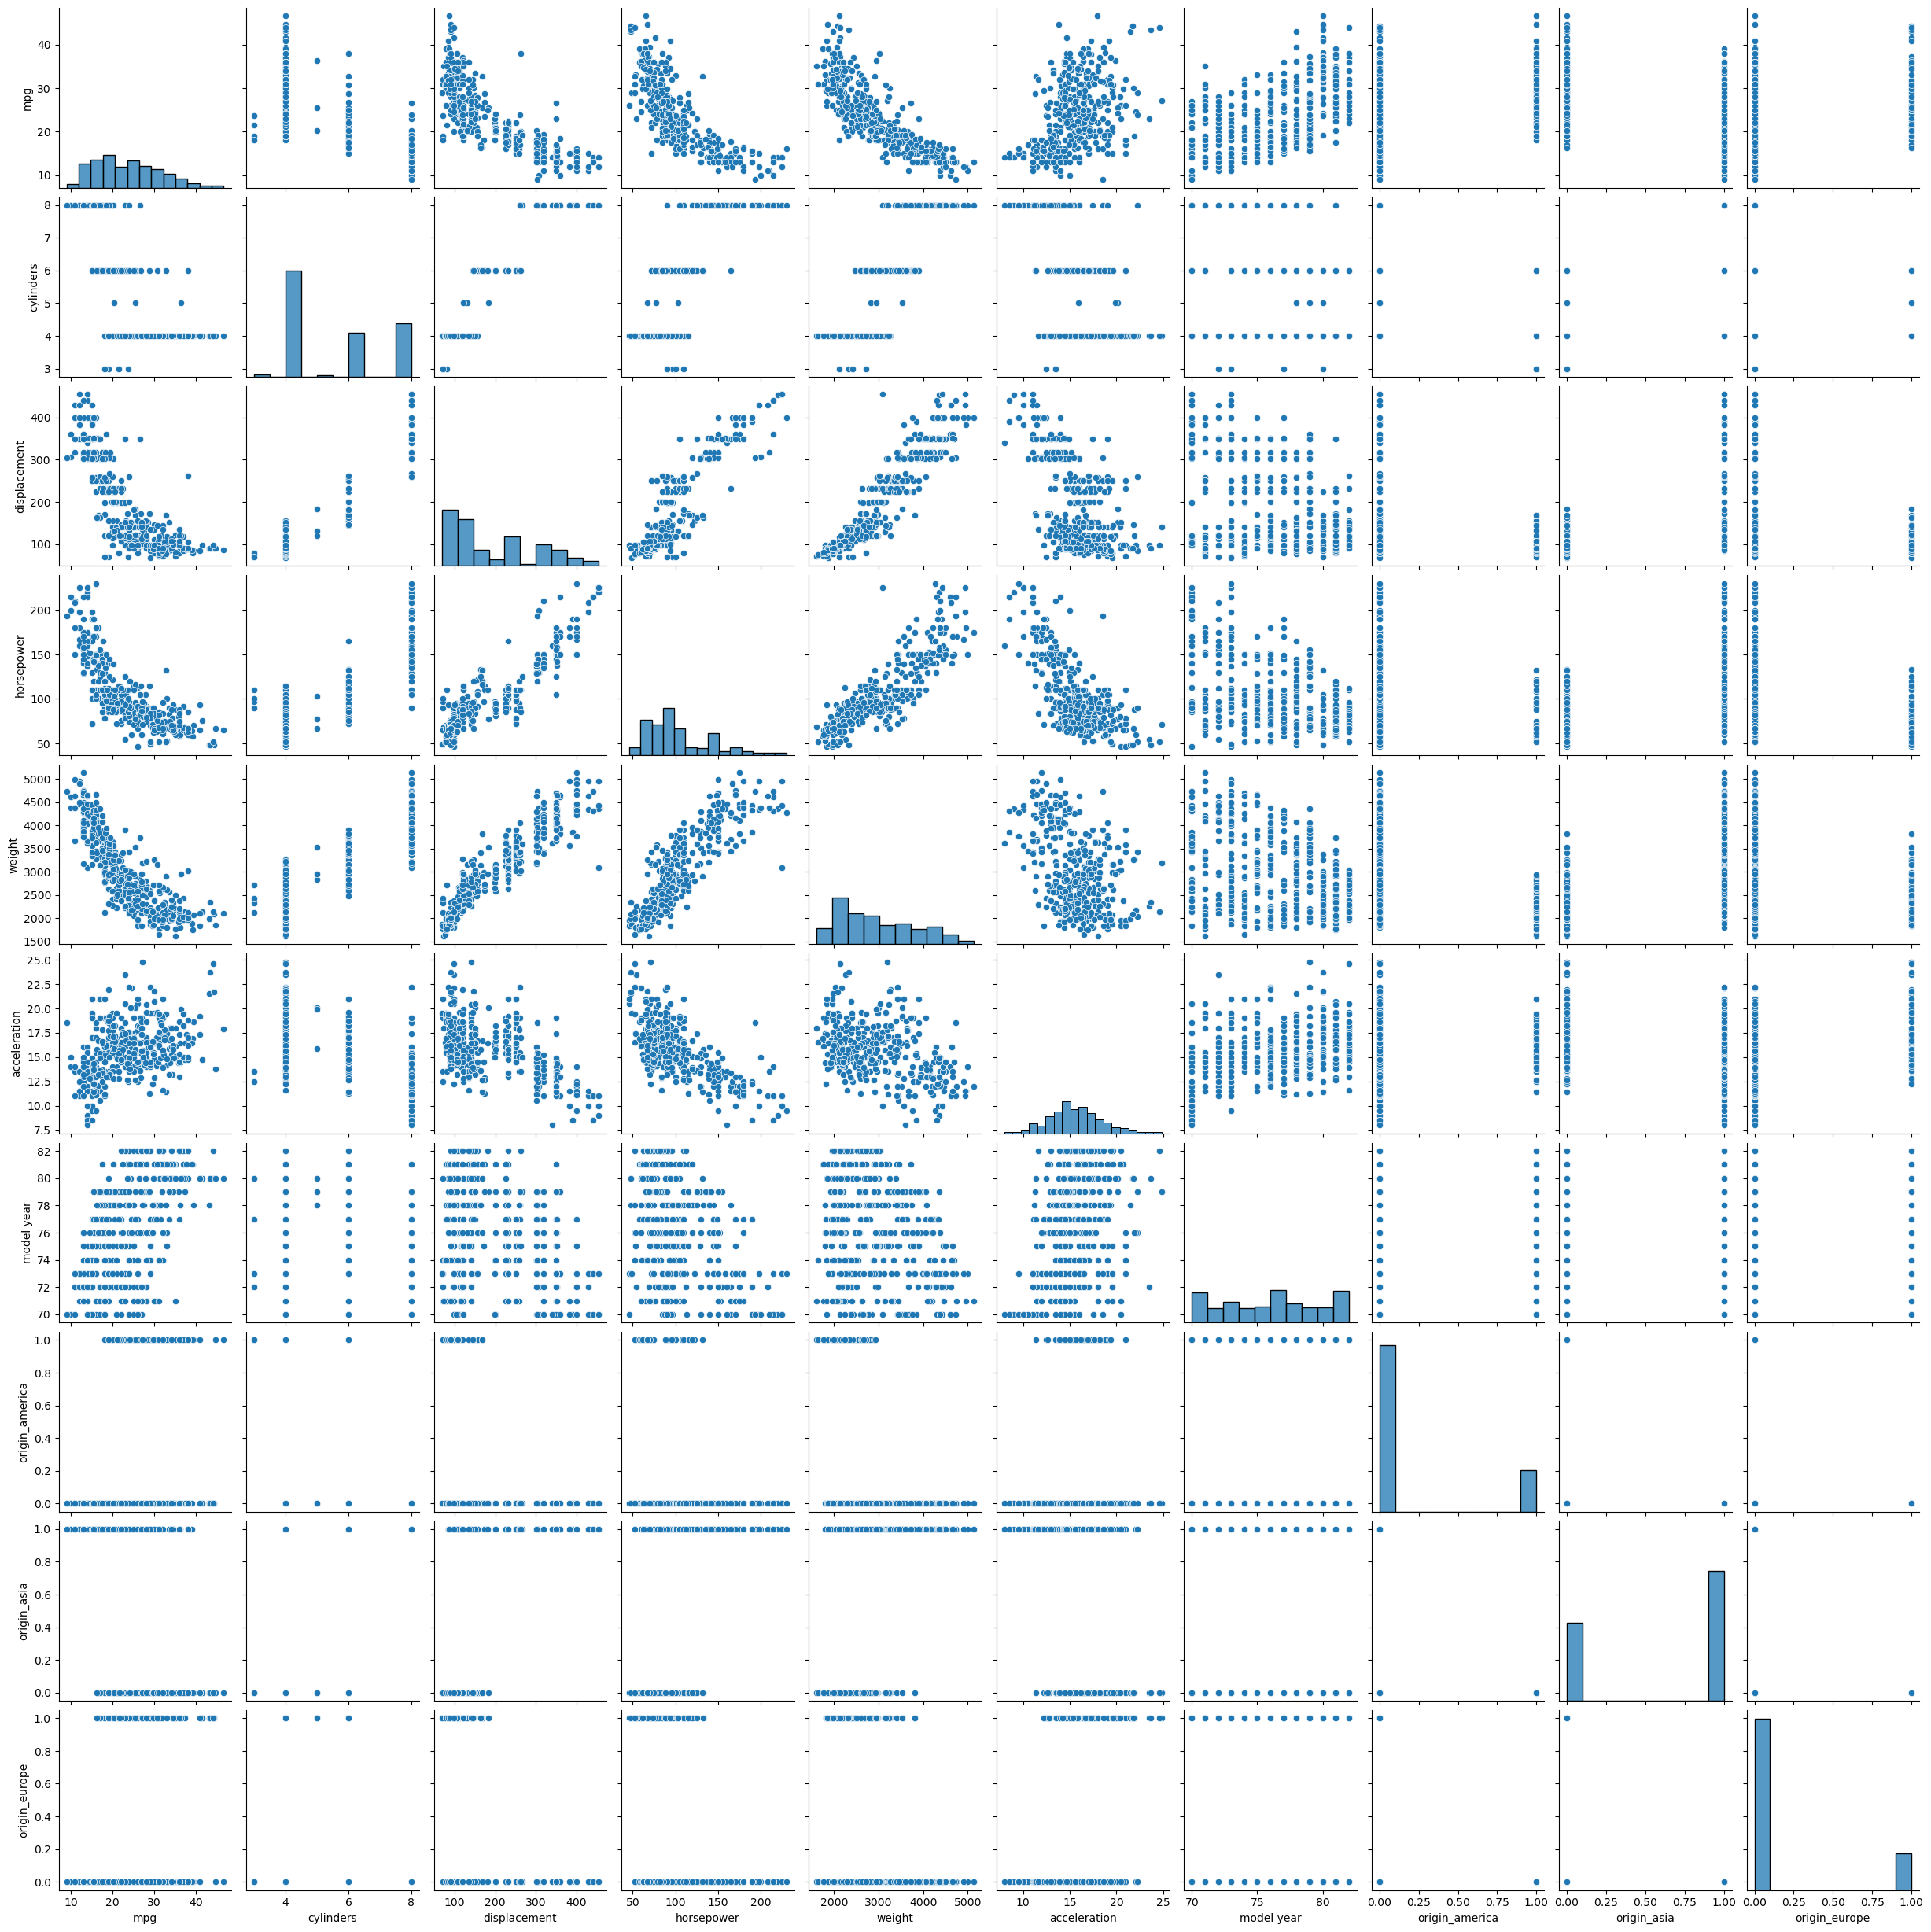

In [19]:
sns.pairplot(data)
plt.show()

In [21]:
x=data.drop(['mpg','origin_europe'],axis=1)
y=data[['mpg']]

In [22]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
0,8,307.0,130.0,3504,12.0,70,0,1
1,8,350.0,165.0,3693,11.5,70,0,1
2,8,318.0,150.0,3436,11.0,70,0,1
3,8,304.0,150.0,3433,12.0,70,0,1
4,8,302.0,140.0,3449,10.5,70,0,1


In [23]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

split data to train and test data

In [25]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [27]:
for i,col_name in enumerate(x_train.columns):
    print("The coeff of {0} is {1}".format(col_name,regression_model.coef_[0][i]))

The coeff of cylinders is -0.3948079661648143
The coeff of displacement is 0.028945510765487077
The coeff of horsepower is -0.021752207723546652
The coeff of weight is -0.007352032065147354
The coeff of acceleration is 0.06191936600761882
The coeff of model year is 0.8369338917645002
The coeff of origin_america is -0.6060179643247362
The coeff of origin_asia is -3.001283000918518


In [28]:
intercept=regression_model.intercept_[0]
print("The intercept for our model is {0}".format(intercept))

The intercept for our model is -18.283451116372174


In [29]:
#R*2 
#out sample
regression_model.score(x_test,y_test)

0.8433135132808832

In [30]:
#in sample
regression_model.score(x_train,y_train)

0.8141025501610559